## 2020 - Midterm
## Question 2 (20 points)

Generate a sample of 200 points from a 2D Gaussian with mean $\mu_1 = \begin{bmatrix} 3 \\ 3 \end{bmatrix}$ and covariance $\Sigma_1 = \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix}$

Generate a second sample of 200 points from a 2D Gaussian with mean $\mu_2 = \begin{bmatrix} 5 \\ 5 \end{bmatrix}$ and covariance $\Sigma_2 = \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix}$.

Assuming the first set of points is class 0 and the second set of points is class 1, split the dataset into 80% training and 20% testing, and plot the
training set and test set in separate plots with different colors for each class below.

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(mu1, Sigma1, mu2, Sigma2):
    X1 = np.random.multivariate_normal(mu1, Sigma1, 200)
    y1 = np.zeros((200,1))
    X2 = np.random.multivariate_normal(mu2, Sigma2, 200)
    y2 = np.ones((200,1))
    X = np.concatenate((X1, X2), 0)
    y = np.concatenate((y1, y2), 0)
    return X, y

In [63]:
mu1 = [3, 3]
Sigma1 = [[4, 0], [0, 4]]
mu2 = [5, 5]
Sigma2 = [[4, 0], [0, 4]]
X, y = generate_data(mu1, Sigma1, mu2, Sigma2)

In [64]:
X[0:5,:], y[0:5]

(array([[5.62133195, 6.3222182 ],
        [4.32301263, 1.86712288],
        [4.06187242, 3.83467884],
        [4.04543285, 5.12012026],
        [1.58288945, 0.69990079]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [65]:
import random
random.seed(12)

percent_train = .8

# Partion data into training and test datasets
m, n = X.shape
#y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = X[train_idx,:]
X_test = X[test_idx,:]
y_train = y[train_idx]
y_test = y[test_idx]

In [66]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (320, 2)
y_train (320, 1)
X_test (80, 2)
y_test (80, 1)


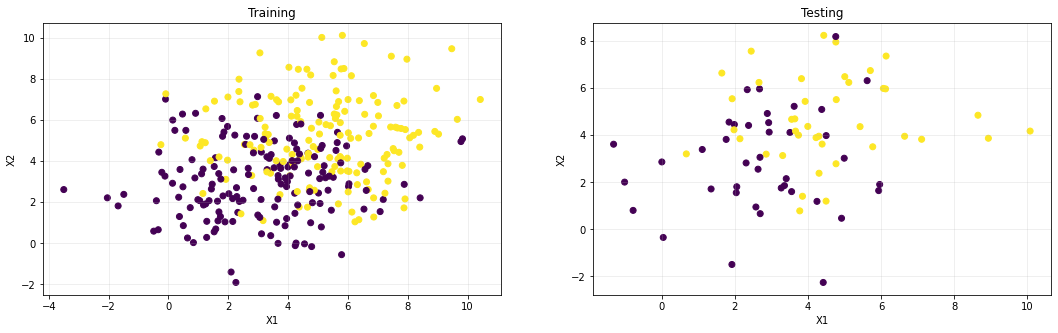

In [67]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)


plt1.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt1.set_title('Training')
plt1.set_xlabel('X1')
plt1.set_ylabel('X2')
plt1.grid(axis='both', alpha=.25)

plt2.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt2.set_title('Testing')
plt2.set_xlabel('X1')
plt2.set_ylabel('X2')
plt2.grid(axis='both', alpha=.25)

In [71]:
idx_0 = np.where(y_test[:,0] == 0)

In [74]:
idx_0[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 11, 13, 21, 23, 25, 29, 31, 34,
       37, 38, 41, 42, 43, 46, 49, 50, 52, 53, 54, 55, 56, 58, 61, 63, 68,
       70, 71, 72, 73, 74, 78])

In [76]:
type(idx_0[0])

numpy.ndarray

In [77]:
selected_X = X[idx_0[0],:]

## Midterm 2019
### Question 4 (20 points)

Next we consider a classification problem. We know that logistic regression is only capable of modeling linear classification boundaries. In this question, you will synthesize a data set that has a nonlinear classification boundary then show that we can obtain a good logistic regression classifier by transforming the data so that an appropriate classification boundary is linear in the new transformed inputs.

**Do the following:**

1. **Generate 100 data points for class 1 in which $x_1$ is sampled uniformly from the range [-3..3] and $x_2$ is sampled from a Gaussian with mean $x_1^2 + 2$ and standard deviation 1.0.**

2. **Generate 100 data points for class 2 in which $x_1$ is sampled uniformly from the range [-3..3] and $x_2$ is sampled from a Gaussian with mean $x_1^2 + 5$ and standard deviation 1.0.**

In [83]:
x11 = np.random.uniform(-3,3,[100,1])
x12 = x11 * x11 + 2 + np.random.normal(0, 1, [100, 1])
X1 = np.concatenate((x11, x12), axis=1)

In [84]:
x11.shape

(100, 1)

In [85]:
X1.shape

(100, 2)

In [86]:
x21 = np.random.uniform(-3,3,[100,1])
x22 = x21 * x21 + 5 + np.random.normal(0, 1, [100, 1])
X2 = np.concatenate((x21, x22), axis=1)

Text(0.5, 1.0, 'Title')

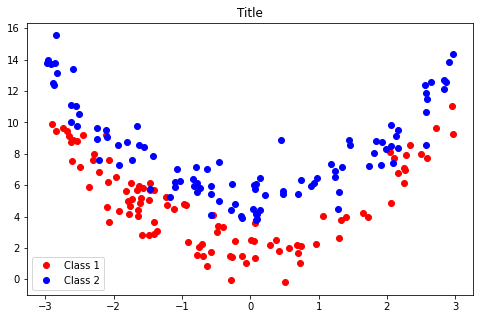

In [91]:
plt.figure(figsize=(8, 5))
plt.plot(X1[:,0], X1[:,1], 'ro', label='Class 1')
plt.plot(X2[:,0], X2[:,1], 'bo', label='Class 2')
plt.legend()
plt.title('Title')

In [97]:
y1 = np.zeros((100,1))
y2 = np.ones((100,1))
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

In [98]:
y[-1,:]

array([1.])

## Lab2 - Non-L Reg

In [99]:
# Generate X
m = 100
X = np.random.uniform(-4, 4, (m,1))

# Generate y
a = 0.7
b = 1
c = 2
y = a * X**2 + b * X + c + np.random.randn(m, 1)

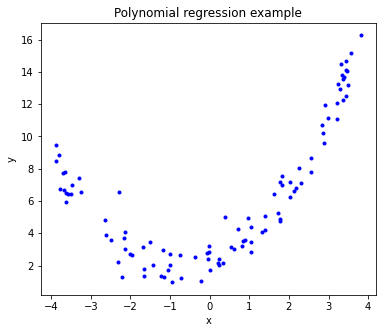

In [102]:
plt.figure(figsize=(6, 5))
plt.plot(X, y, 'b.')
plt.title('Polynomial regression example')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Lab5 - Newton's Method

## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

Generate 100 samples for each of the classes.

In [ ]:
mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100

cov_mat = np.matrix([[np.square(sigma_1),0],[0,np.square(sigma_1)]])
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)


# 1. Create sample angle from 0 to 2pi with 100 samples
angle = np.random.uniform(0, 2*np.pi, num_sample)
# 2. Create sample with normal distribution of d with mean and variance
d_mean = np.square(3*sigma_1)
d_std = np.square(0.5*sigma_1)
d = np.random.normal(loc=d_mean, scale=d_std, size=num_sample)
# 3 Create X2
x1 = X1[:,0]+ d*np.cos(angle)
x2 = X1[:,1]+ d*np.sin(angle)
X2 = np.array([x1,x2]).T

In [ ]:
#Version2 - form solution

# Generate data for class 1

mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100
cov_mat = np.matrix([[sigma_1,0],[0,sigma_1]])
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)

# Generate data for class 2

angle = np.random.uniform(0, 2*np.pi, num_sample)
d =  np.random.normal(np.square(3*sigma_1),np.square(.5*sigma_1),num_sample)
X2 = np.array([X1[:,0] + d*np.cos(angle), X1[:,1] + d*np.sin(angle)]).T

# Combine X1 and X2 into single dataset

X = np.concatenate([X1, X2],axis = 0)
y = np.append(np.zeros(num_sample),np.ones(num_sample))